In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

PROTEIN_NAME = "Spike"

BACKGROUND_NUM_FILE = "output/background_num.csv"
MUTATION_NUM_FILE = "data/mutation_num_" + PROTEIN_NAME + ".json"

VARIANT_NAMES = ("Alpha-related", "Delta-related", "", "Gamma-related", "")
SITES_TO_PLOT = pd.DataFrame.from_records([
    (501, 156, 18, 190, 152),
    (681, 681, 20, 417, 701),
    (716, 452, 26, 484, 1027),
    (1118, 950, 138, 655, 1176)
], columns=VARIANT_NAMES)


In [2]:
bg_num = pd.read_csv(BACKGROUND_NUM_FILE)
bg_num["Date"] = pd.to_datetime(bg_num["Date"])
bg_num = bg_num.groupby("Date").sum().reset_index()

with open(MUTATION_NUM_FILE) as f:
    mutation_num = json.load(f)


In [3]:
mut_num = []
for area in mutation_num:
    for site_name in mutation_num[area]:
        for c_date in mutation_num[area][site_name]:
            mut_num.append({
                "Area": area,
                "Date": c_date,
                "Mut_num": mutation_num[area][site_name][c_date],
                "Site": int(site_name),
            })
mut_num = pd.DataFrame.from_records(mut_num)
mut_num["Date"] = pd.to_datetime(mut_num["Date"])
mut_num = mut_num.groupby(["Date", "Site"]).sum().reset_index()


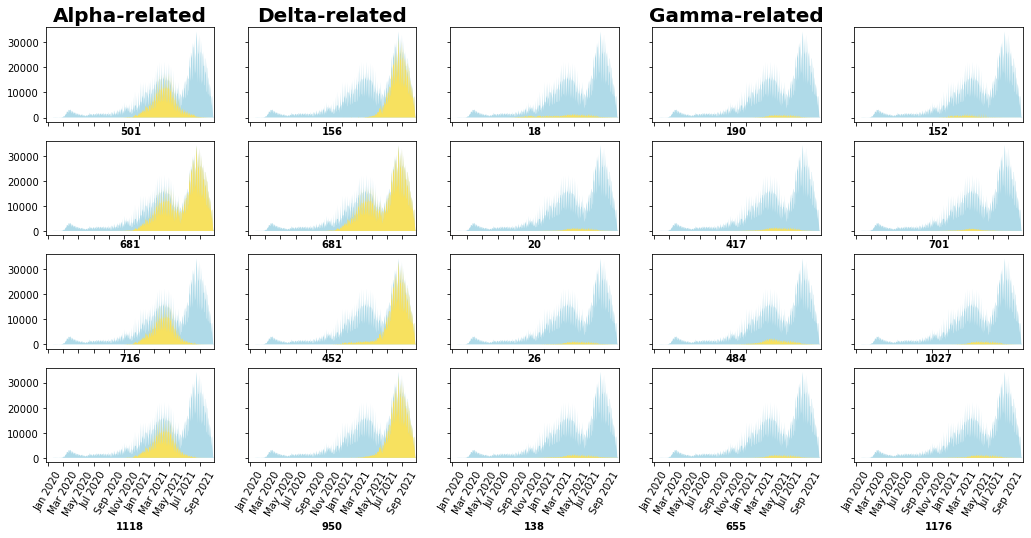

In [23]:
nrows = len(SITES_TO_PLOT.index)
ncols = len(SITES_TO_PLOT.columns)

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    sharex=True,
    sharey=True,
    figsize = (3.5 * ncols, 8)
)

x_pos = bg_num["Date"].values
x_pos.sort()

for i in range(nrows):
    for j in range(ncols):
        variant_name = VARIANT_NAMES[j]
        site_name = SITES_TO_PLOT.iloc[i, j]
        site_num = mut_num[mut_num["Site"] == site_name]

        ax = axes[i][j]
        ax.fill_between(bg_num["Date"], 0, bg_num["Total_num"], label = "Backgroup", facecolor='#AFDAE8')
        ax.fill_between(site_num["Date"], 0, site_num["Mut_num"], label = "mutation", facecolor='#F7E15F')
        ax.tick_params(axis='x', labelrotation=60)
        ax.set_xlim([x_pos[1], x_pos[-1]])
        ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
        ax.set_xlabel(site_name, fontweight='bold')
        if i == 0:
            ax.set_title(variant_name, fontsize=20, fontweight="bold")

plt.show()
plt.close()
